## **Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

1. **`tensorflow` and `keras`:** Core frameworks for machine learning and deep learning.
2. **`Sequential`:** A linear stack of layers to build a model layer by layer.
3. **`Dense`:** A fully connected layer in a neural network.
4. **`Conv2D`:** A convolutional layer for processing image data.
5. **`MaxPool2D`:** A max pooling layer for down-sampling image data.
6. **`Flatten`:** A layer to convert multidimensional data into a 1D vector, typically used before feeding data into a dense layer.

## **Image Data Loading**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.7MB/s]


In [4]:
import zipfile

with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',        # Path to the directory containing images.
    labels='inferred',                # Labels are inferred from the folder names.
    label_mode='int',                 # Labels are provided as integers (e.g., 0, 1, 2).
    batch_size=32,                    # Each batch will contain 32 images.
    image_size=(256, 256)             # Resizes each image to 256x256 pixels.
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',        # Path to the same directory for validation
    labels='inferred',                # Labels are inferred from the folder names.
    label_mode='int',                 # Labels are provided as integers (e.g., 0, 1, 2).
    batch_size=32,                    # Each batch will contain 32 images.
    image_size=(256, 256)             # Resizes each image to 256x256 pixels.
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### Explanation of Parameters Used:
1. **`directory='Datasets/test'`**  
   - The path where the image data is stored. Each subdirectory in this folder represents a class label.
   
2. **`labels='inferred'`**  
   - The labels are automatically assigned based on the names of the subdirectories (e.g., `cat`, `dog`).

3. **`label_mode='int'`**  
   - Labels will be returned as integers (e.g., `0` for `cat`, `1` for `dog`).

4. **`batch_size=32`**  
   - The number of images processed together in each training or validation step.

5. **`image_size=(256, 256)`**  
   - Resizes all images to a uniform size of 256x256 pixels for consistent input to the model.


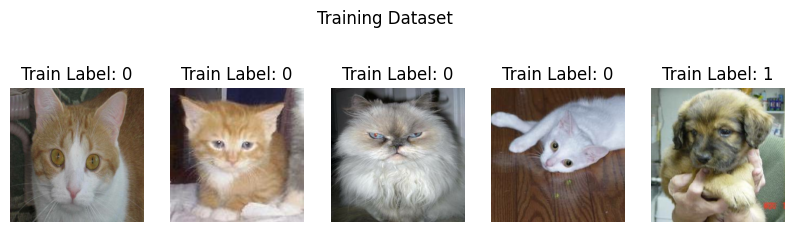

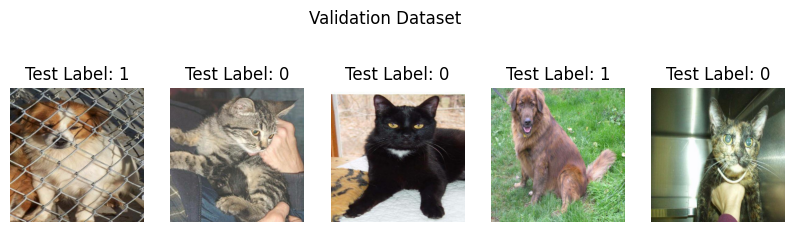

In [6]:
import matplotlib.pyplot as plt

# Display the first batch of 5 images from train_ds
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 3))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Train Label: {labels[i].numpy()}")
        plt.axis('off')
    plt.suptitle("Training Dataset")  # Title for train images
    plt.show()

# Display the first batch of 5 images from validation_ds
for images, labels in validation_ds.take(1):
    plt.figure(figsize=(10, 3))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Test Label: {labels[i].numpy()}")
        plt.axis('off')
    plt.suptitle("Validation Dataset")  # Title for test images
    plt.show()


- **Loop through `train_ds.take(1)`**: Retrieves the first batch of images and labels from the training dataset.
- **Create figure with `plt.figure(figsize=(10, 3))`**: Defines the figure size for displaying images in a row.
- **Loop through 5 images**: Loops through the first 5 images in the batch to display.
- **Create subplots with `plt.subplot(1, 5, i+1)`**: Organizes the images in a single row (1 row, 5 columns).
- **Display image with `plt.imshow(images[i].numpy().astype("uint8"))`**: Converts and displays each image.
- **Add title with `plt.title(f"Train Label: {labels[i].numpy()}")`**: Adds the image's label as the title.
- **Hide axis with `plt.axis('off')`**: Removes axis ticks and labels for cleaner display.
- **Add overall title with `plt.suptitle("Training Dataset")`**: Labels the entire figure as "Training Dataset".
- **Display images with `plt.show()`**: Renders the plot with the images.
- **Repeat for `validation_ds`**: Same steps for displaying 5 images from the validation dataset, with "Validation Dataset" title.


## **Normalize**

In [7]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

## **CNN Model**

In [8]:
model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())  # Flatten the output of the convolutional layers

model.add(Dense(128, activation='relu'))  # Fully connected layer with 128 units and ReLU activation
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))  # Fully connected layer with 64 units and ReLU activation
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit and sigmoid activation (for binary classification)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1. **Model Initialization**: `Sequential()` creates a linear stack of layers where each layer flows into the next.

2. **Convolutional and Pooling Layers**:
   - **First Block**:
     - `Conv2D(32, kernel_size=(3,3), ...)` applies 32 filters of size 3x3 with ReLU activation to extract features. The input image shape is `(256,256,3)`.
     - `MaxPool2D(pool_size=(2,2), strides=2, ...)` reduces the spatial dimensions by half (down-sampling) using 2x2 pooling.
   - **Second and Third Blocks**: These repeat the convolutional and pooling process with increasing filter sizes (64 and 128), allowing the network to learn more complex patterns.

3. **Flattening**: `Flatten()` converts the 2D feature maps into a 1D vector for the fully connected layers.

4. **Fully Connected Layers**:
   - `Dense(128, activation='relu')`: A dense layer with 128 neurons and ReLU activation for learning complex patterns.
   - `Dense(64, activation='relu')`: Another dense layer with 64 neurons and ReLU activation for further learning.

5. **Output Layer**: `Dense(1, activation='sigmoid')` outputs a single value (0 or 1) using the sigmoid activation, suitable for binary classification tasks.

### Code:
```python
model.add(BatchNormalization())
```

### Explanation:
**`BatchNormalization()`** is a layer used to normalize the activations of the previous layer during training.

#### What It Does:
1. **Normalizes Inputs**:
   - It standardizes the outputs (activations) of the previous layer to have a mean of 0 and a standard deviation of 1 for each batch of data.
   
2. **Adjusts Output**:
   - After normalization, it introduces two learnable parameters:
     - **`gamma`** (scale) to control the variance.
     - **`beta`** (shift) to control the mean.

3. **Improves Stability**:
   - Helps to stabilize and accelerate training by reducing internal covariate shift (changes in distribution of layer inputs during training).

#### Why Use It:
- **Faster Convergence**: Speeds up training by allowing the model to use higher learning rates.
- **Regularization**: Acts as a form of regularization, reducing the need for other techniques like dropout.
- **Improved Performance**: Reduces sensitivity to weight initialization, leading to more robust training.

#### Where It's Used:
- Typically added after convolutional or dense layers but before activation functions (e.g., ReLU) for better performance.

---

### Summary:
- **Purpose**: Normalizes the layer’s output for stable and efficient training.
- **Key Benefit**: Faster and more stable convergence during training.

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- **`model.compile()`** prepares the model for training by specifying how the model will learn (`optimizer`), how to measure learning (`loss`), and how to evaluate performance (`metrics`).

1. **Optimizer**:
   - `'adam'`: The Adam optimizer is used, which combines the benefits of Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp) for efficient and adaptive learning.

2. **Loss Function**:
   - `'binary_crossentropy'`: This is used for binary classification tasks. It measures the difference between predicted probabilities and actual labels, optimizing the model for accurate binary outputs.

3. **Metrics**:
   - `['accuracy']`: Tracks the model's accuracy during training and evaluation, showing the proportion of correct predictions.

This setup ensures the model trains efficiently for binary classification problems.

In [11]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.5614 - loss: 2.8398 - val_accuracy: 0.5866 - val_loss: 0.6550
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6155 - loss: 0.6509 - val_accuracy: 0.6176 - val_loss: 0.8898
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.6709 - loss: 0.6247 - val_accuracy: 0.7258 - val_loss: 0.5574
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7245 - loss: 0.5356 - val_accuracy: 0.6562 - val_loss: 0.7622
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7580 - loss: 0.4820 - val_accuracy: 0.7042 - val_loss: 0.5356
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7817 - loss: 0.4348 - val_accuracy: 0.7062 - val_loss: 0.6930
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.8083 - loss: 0.3805 - val_accuracy: 0.7854 - val_loss: 0.5271
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 81ms/step - accuracy: 0.8313 - loss: 0.3352 - 

The `model.fit()` method trains the neural network using the training dataset and evaluates it using the validation dataset during each epoch. Here's what this specific code does:

#### 1. **Training Data** (`train_ds`):
   - `train_ds`: The dataset used to train the model. This contains the input data (features) and corresponding labels (outputs).

#### 2. **Number of Epochs** (`epochs=10`):
   - The model will go through the entire training dataset 10 times to update its weights and minimize the loss.

#### 3. **Validation Data** (`validation_data=validation_ds`):
   - `validation_ds`: A separate dataset that the model uses for evaluation at the end of each epoch. This helps track performance on unseen data and prevents overfitting.

#### 4. **Outputs**:
   - The method returns a `history` object that stores the training process's metrics (e.g., loss and accuracy for both training and validation). You can use it to visualize or analyze the training progress.

### Key Process:
   - For each epoch:
     1. The model computes predictions on `train_ds` and adjusts weights using backpropagation based on the loss function.
     2. It evaluates performance on `validation_ds` without updating weights, providing a measure of generalization.


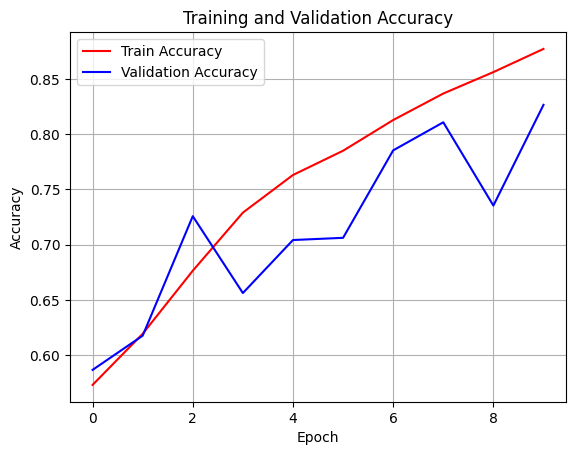

In [12]:
plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.legend()  # Add a legend to the plot
plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
plt.ylabel('Accuracy')  # Label the y-axis as 'Accuracy'
plt.title('Training and Validation Accuracy')  # Add a title to the plot
plt.grid(True)  # Display a grid on the plot for better readability
plt.show()

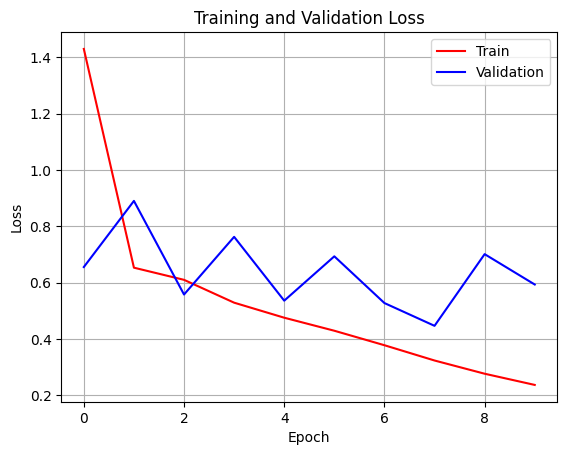

In [13]:
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Validation')
plt.legend()  # Add a legend to the plot
plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
plt.ylabel('Loss')  # Label the y-axis as 'Accuracy'
plt.title('Training and Validation Loss')  # Add a title to the plot
plt.grid(True)  # Display a grid on the plot for better readability
plt.show()

**As we can see, There is Overfitting Now to reduce overfitting :**

1.Add more data

2.Data Augmentation

3.L1/L2 Regularizer

4.Dropout

5.Batch Norm

6.Reduce complexity

## **Prediction**

In [28]:
import cv2

In [34]:
test_img = cv2.imread('/content/ai-generated-stray-cat-in-danger-background-animal-background-photo.jpg')

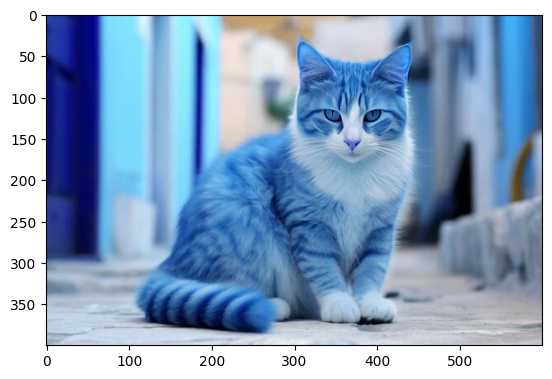

In [35]:
plt.imshow(test_img)

In [36]:
test_img.shape

(400, 600, 3)

In [37]:
test_img = cv2.resize(test_img, (256,256))

In [43]:
test_input = test_img.reshape((1,256,256,3))

In [44]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[2.3181525e-23]], dtype=float32)